<a href="https://colab.research.google.com/github/linhoangce/pytorch_crash_course/blob/main/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fundamental Exercise

In [ ]:
import torch

## Creating a tensor with shape (7, 7)

In [ ]:
x = torch.rand(7, 7)
x, x.shape

(tensor([[5.5806e-01, 5.2223e-01, 4.5548e-01, 4.5056e-01, 8.0380e-01, 4.1528e-01,
          7.3503e-01],
         [9.2096e-01, 2.9205e-01, 6.7716e-03, 1.8952e-01, 8.4296e-01, 4.5395e-01,
          5.3295e-01],
         [4.3641e-01, 5.2626e-02, 6.4297e-02, 2.0089e-01, 9.8469e-01, 3.1827e-01,
          4.7220e-01],
         [6.7288e-04, 7.0313e-01, 1.0021e-01, 8.5566e-01, 5.4543e-01, 5.4132e-01,
          9.1267e-01],
         [1.5919e-01, 8.3670e-01, 1.9544e-02, 5.4407e-01, 1.9586e-01, 1.3710e-02,
          6.8203e-01],
         [2.3225e-01, 4.1663e-01, 3.4217e-01, 6.0002e-01, 9.7438e-01, 4.9423e-01,
          1.9499e-01],
         [8.6962e-01, 5.5451e-01, 8.9064e-01, 2.6943e-01, 8.3985e-01, 2.2111e-01,
          3.4568e-03]]),
 torch.Size([7, 7]))

3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7)

In [ ]:
y = torch.rand(1, 7)
y

tensor([[0.7849, 0.8634, 0.0867, 0.5700, 0.7796, 0.6620, 0.0718]])

In [ ]:
result = torch.matmul(x, y.T)
result, result.shape

(tensor([[2.1396],
         [2.0796],
         [1.5203],
         [1.9531],
         [1.3699],
         [2.0145],
         [2.1935]]),
 torch.Size([7, 1]))

4. Set the random seed to 0 and do 2 & 3 over again.


In [ ]:
torch.manual_seed(0)
x = torch.rand(7, 7)
x

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

In [ ]:
y = torch.rand(1, 7)

torch.matmul(x, y.T), torch.matmul(x, y.T).shape

(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]),
 torch.Size([7, 1]))

Setting ramdom seed on GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(1234)
a = torch.rand(2, 3).to(device)
b = torch.rand(2, 3).to(device)

a, b


(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))

In [ ]:
X = torch.matmul(a, b.T)
X, X.shape

(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'),
 torch.Size([2, 2]))

In [ ]:
# find max
torch.max(X)

tensor(0.5617, device='cuda:0')

In [ ]:
# find min
X.min()

tensor(0.3647, device='cuda:0')

Make a random tensor with shape (1, 1, 1, 10)

In [ ]:
torch.manual_seed(7)
g = torch.rand(1, 1, 1, 10)
g, g.shape

(tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
            0.3653, 0.8513]]]]),
 torch.Size([1, 1, 1, 10]))

In [ ]:
g_squeezed = torch.squeeze(g)
g_squeezed

tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])

## PyTorch Workflow

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [8]:
# Device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Create a straight line dataset using the linear regression formula `weight * X + bias`

* `weight = 0.3` and `bias = 0.9` there should be at least 100 data points total.
*Split the data into 80% training, 20% testing.
*Plot the training and testing data so it becomes visible

In [12]:
# Create the data parameters
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X sample: {len(X)}")
print(f"Nuber of y samples: {len(y)}")
print(f"First 10 X & y sample: \nX: {X[:10]} \ny: {y[:10]}")

Number of X sample: 100
Nuber of y samples: 100
First 10 X & y sample: 
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) 
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [13]:
# Split data into training and testing
split_data = int(0.8 * len(X))

X_train, X_test = X[:split_data], X[split_data:]
y_train, y_test = y[:split_data], y[split_data:]


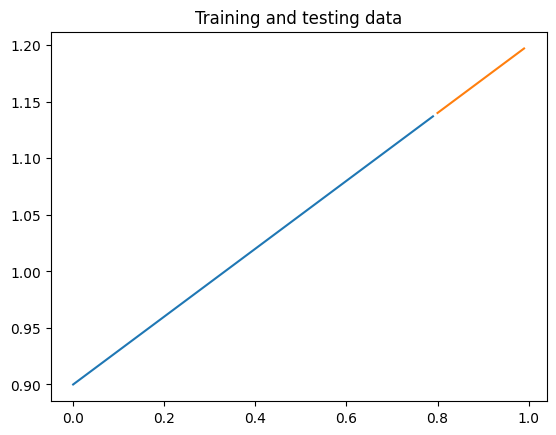

In [20]:
plt.plot(X_train, y_train, label="Training data")
plt.plot(X_test,y_test, label="Testing data")
plt.title("Training and testing data")
plt.show()

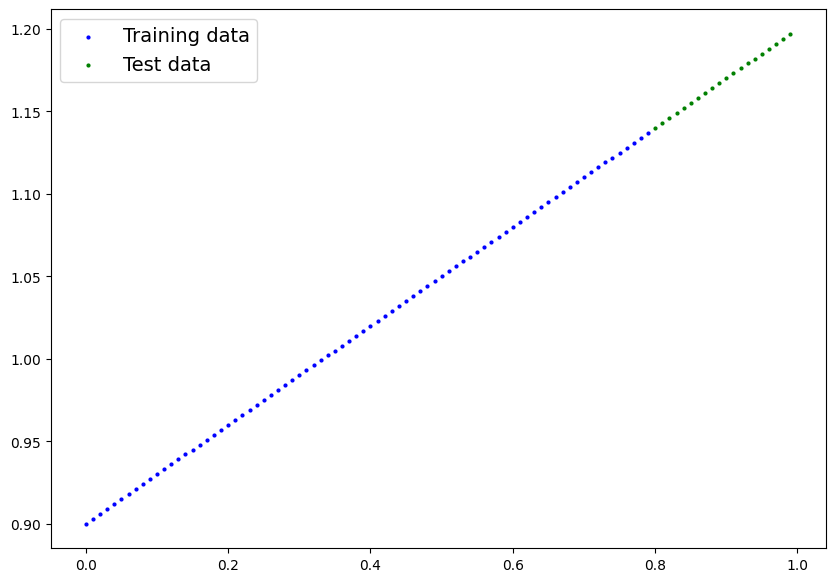

In [26]:
# plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize= (10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_predictions()

2. Build a PyTorch model by subclassing `nn.Module`



In [17]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(
                                torch.randn(
                                    1,
                                    requires_grad=True,
                                    dtype=torch.float
                                    ))
    self.bias = nn.Parameter(
                              torch.randn(
                                  1,
                                  requires_grad=True,
                                  dtype=torch.float
                                  ))

  def forward(self, X):
    return self.weights * X + self.bias

In [18]:
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([2.1745])), ('bias', tensor([1.2080]))])

In [30]:
# Create the Model using nn.Linear
class LinearRegressionModelV1(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, X):
    return self.linear_layer(X)

In [39]:
model_1 = LinearRegressionModelV1()

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7148]])),
             ('linear_layer.bias', tensor([0.2856]))])

In [40]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)`

* The learning rate of the optimizer is to be 0.01
* Write a training loop to perform the appropriate training steps for 300 epochs
* The training loop should test the model on the test dataset every 20 epochs

In [41]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [42]:
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimize
  optimizer.step()

  if epoch % 20 == 0:
    model_1.eval() # turning of parameter tracking

    with torch.inference_mode():
      test_pred = model_1(X_test)
      test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.4505361020565033 | Test loss: 0.22958436608314514
Epoch: 20 | Loss: 0.2193313091993332 | Test loss: 0.04185645654797554
Epoch: 40 | Loss: 0.11864197254180908 | Test loss: 0.18953189253807068
Epoch: 60 | Loss: 0.10407471656799316 | Test loss: 0.22087569534778595
Epoch: 80 | Loss: 0.09649636596441269 | Test loss: 0.2187877893447876
Epoch: 100 | Loss: 0.08956664800643921 | Test loss: 0.20626191794872284
Epoch: 120 | Loss: 0.08271261304616928 | Test loss: 0.19096677005290985
Epoch: 140 | Loss: 0.07585858553647995 | Test loss: 0.17567157745361328
Epoch: 160 | Loss: 0.06900455802679062 | Test loss: 0.1603764146566391
Epoch: 180 | Loss: 0.06215051934123039 | Test loss: 0.14508120715618134
Epoch: 200 | Loss: 0.05529649183154106 | Test loss: 0.12978604435920715
Epoch: 220 | Loss: 0.04844440519809723 | Test loss: 0.11380290240049362
Epoch: 240 | Loss: 0.041593290865421295 | Test loss: 0.09747578948736191
Epoch: 260 | Loss: 0.034742116928100586 | Test loss: 0.08114829659461975


4. Make predictions with the trained model on the test data

In [44]:
# Make predictions with the model
model_1.eval()

with torch.inference_mode():
  test_y_pred = model_1(X_test)
  test_loss = loss_fn(test_y_pred, y_test)

test_y_pred, test_loss

(tensor([[1.1797],
         [1.1837],
         [1.1877],
         [1.1918],
         [1.1958],
         [1.1999],
         [1.2039],
         [1.2080],
         [1.2120],
         [1.2161],
         [1.2201],
         [1.2242],
         [1.2282],
         [1.2323],
         [1.2363],
         [1.2404],
         [1.2444],
         [1.2485],
         [1.2525],
         [1.2566]], device='cuda:0'),
 tensor(0.0496, device='cuda:0'))

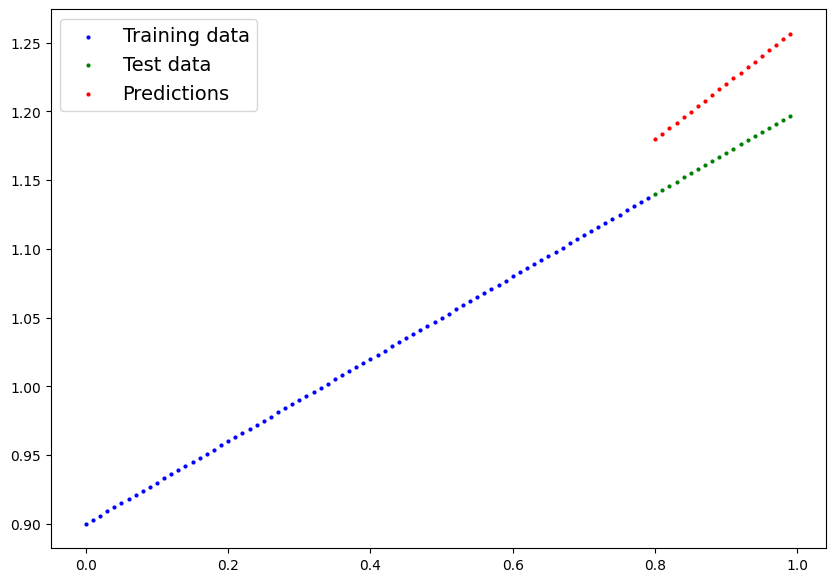

In [46]:
plot_predictions(predictions=test_y_pred.cpu())

5. Save trained model

In [47]:
# 1. Create dir
from pathlib import Path

PATH = Path("model_ex")
PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "exercise_model.pth"
MODEL_SAVE_PATH = PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to : model_ex/exercise_model.pth


In [49]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8559], device='cuda:0'))])

In [56]:
# Test the saved model
loaded_model = LinearRegressionModelV1()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model

LinearRegressionModelV1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
loaded_model.to(device)

LinearRegressionModelV1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [59]:
# Make predictions and compare to the previous
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds == test_y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')